<a href="https://colab.research.google.com/github/khoatna065/Portfolio-Project/blob/main/RFM_analysis_project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

### Import Library

In [ ]:
import numpy as np
import pandas as pd


import time, warnings
import datetime as dt
from datetime import datetime

#visualizations
import matplotlib.pyplot as plt
from pandas.plotting import scatter_matrix
%matplotlib inline
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

### Import file and read the data

In [ ]:
from google.colab import files
uploaded = files.upload()


Saving ecommerce retail.xlsx to ecommerce retail.xlsx


In [ ]:
data = pd.read_excel('ecommerce retail.xlsx', sheet_name ='ecommerce retail')
data.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


### Data wrangling

In [ ]:
#explore data
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


,Quantity,UnitPrice,CustomerID
count,541909.000000,541909.000000,406829.000000
mean,9.552250,4.611114,15287.690570
std,218.081158,96.759853,1713.600303
min,-80995.000000,-11062.060000,12346.000000
25%,1.000000,1.250000,13953.000000
50%,3.000000,2.080000,15152.000000
75%,10.000000,4.130000,16791.000000
max,80995.000000,38970.000000,18287.000000


In [ ]:
#cleaning and filtering data
data.dropna(subset=['CustomerID'],inplace=True)
data.drop(data[(data.Quantity <= 0)].index,inplace = True)
data.drop(data[(data.UnitPrice <= 0)].index,inplace = True)
data.loc[data['Country'] == 'United KingDom']
data.info()
data.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 397884 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    397884 non-null  object        
 1   StockCode    397884 non-null  object        
 2   Description  397884 non-null  object        
 3   Quantity     397884 non-null  int64         
 4   InvoiceDate  397884 non-null  datetime64[ns]
 5   UnitPrice    397884 non-null  float64       
 6   CustomerID   397884 non-null  float64       
 7   Country      397884 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 27.3+ MB


,Quantity,UnitPrice,CustomerID
count,397884.000000,397884.000000,397884.000000
mean,12.988238,3.116488,15294.423453
std,179.331775,22.097877,1713.141560
min,1.000000,0.001000,12346.000000
25%,2.000000,1.250000,13969.000000
50%,6.000000,1.950000,15159.000000
75%,12.000000,3.750000,16795.000000
max,80995.000000,8142.750000,18287.000000


## RFM Analyst
RFM (Recency, Frequency, Monetary) analysis is a customer segmentation technique that uses past purchase behavior to divide customers into groups. RFM helps divide customers into various categories or clusters to identify customers who are more likely to respond to promotions and also for future personalization services.

RECENCY (R): Days since last purchase

FREQUENCY (F): Total number of purchases

MONETARY VALUE (M): Total money this customer spent.


In [ ]:
target_date = dt.datetime(2011,12,31)
target_date

datetime.datetime(2011, 12, 31, 0, 0)

In [ ]:
#calculate RFM metrics
data['total_amount'] = data['Quantity'] * data['UnitPrice']
rfm_table = data.groupby('CustomerID').agg({'InvoiceDate': lambda date: (target_date - date.max()).days,
                                            'InvoiceNo': lambda inv : len(np.unique(inv)),
                                            'total_amount' : lambda spent : sum(spent)}).reset_index()
rfm_table.columns

Index(['CustomerID', 'InvoiceDate', 'InvoiceNo', 'total_amount'], dtype='object')

In [ ]:
#change the name of columns
rfm_table.rename(columns={'InvoiceDate' : 'Recency',
                          'InvoiceNo' : 'Frequency',
                          'total_amount' : 'Monetary'} , inplace=True)
rfm_table

,CustomerID,Recency,Frequency,Monetary
0,12346.0,346,1,77183.60
1,12347.0,23,7,4310.00
2,12348.0,96,4,1797.24
3,12349.0,39,1,1757.55
4,12350.0,331,1,334.40
...,...,...,...,...
4333,18280.0,298,1,180.60
4334,18281.0,201,1,80.82
4335,18282.0,28,2,178.05
4336,18283.0,24,16,2094.88


###Computing quartile of RFM value
Customers with the lowest recency, highest frequency and monetary amounts considered as top customers.

In [ ]:
#calculate rfm score
rfm_table['R_score'] = pd.qcut(rfm_table['Recency'], 5, ['5','4','3','2','1'])

rfm_table['F_score'] = pd.qcut(rfm_table['Frequency'].rank(method='first'), 5, ['1','2','3','4','5'])

rfm_table['M_score'] = pd.qcut(rfm_table['Monetary'], 5, ['1','2','3','4','5'])

rfm_table['RFM_score'] = 100*rfm_table['R_score'].astype(int)+10*rfm_table['F_score'].astype(int)+rfm_table['M_score'].astype(int)
rfm_table

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score
0,12346.0,346,1,77183.60,1,1,5,115
1,12347.0,23,7,4310.00,5,5,5,555
2,12348.0,96,4,1797.24,2,4,4,244
3,12349.0,39,1,1757.55,4,1,4,414
4,12350.0,331,1,334.40,1,1,2,112
...,...,...,...,...,...,...,...,...
4333,18280.0,298,1,180.60,1,2,1,121
4334,18281.0,201,1,80.82,1,2,1,121
4335,18282.0,28,2,178.05,5,3,1,531
4336,18283.0,24,16,2094.88,5,5,5,555


In [ ]:
seg = pd.read_excel('/content/ecommerce retail.xlsx', sheet_name ='Segmentation')
seg.head()

,Segment,RFM Score
0,Champions,"555, 554, 544, 545, 454, 455, 445"
1,Loyal,"543, 444, 435, 355, 354, 345, 344, 335"
2,Potential Loyalist,"553, 551, 552, 541, 542, 533, 532, 531, 452, 4..."
3,New Customers,"512, 511, 422, 421, 412, 411, 311"
4,Promising,"525, 524, 523, 522, 521, 515, 514, 513, 425,42..."


In [ ]:
seg['RFM Score'] = seg['RFM Score'].str.split(',')
seg = seg.explode('RFM Score').reset_index(drop = True)
seg.head()

,Segment,RFM Score
0,Champions,555
1,Champions,554
2,Champions,544
3,Champions,545
4,Champions,454


In [ ]:
#check dtype of 2 columns
print(rfm_table['RFM_score'].dtype)
print(seg['RFM Score'].dtype)

int64
object


In [ ]:
seg['RFM Score'] = seg['RFM Score'].astype('int64')
print(seg['RFM Score'].dtype)

int64


In [ ]:
#merger 2 tables
rfm_table = rfm_table.merge(seg, how='left', left_on='RFM_score', right_on='RFM Score')

In [ ]:
rfm_table.drop('RFM Score', axis=1)

,CustomerID,Recency,Frequency,Monetary,R_score,F_score,M_score,RFM_score,Segment
0,12346.0,346,1,77183.60,1,1,5,115,Cannot Lose Them
1,12347.0,23,7,4310.00,5,5,5,555,Champions
2,12348.0,96,4,1797.24,2,4,4,244,At Risk
3,12349.0,39,1,1757.55,4,1,4,414,Promising
4,12350.0,331,1,334.40,1,1,2,112,Lost customers
...,...,...,...,...,...,...,...,...,...
4333,18280.0,298,1,180.60,1,2,1,121,Lost customers
4334,18281.0,201,1,80.82,1,2,1,121,Lost customers
4335,18282.0,28,2,178.05,5,3,1,531,Potential Loyalist
4336,18283.0,24,16,2094.88,5,5,5,555,Champions


## Visualization and insight

### Distribution of Recency, Frequency, Monetary

Cả 3 phân phối đều bị lệch phải, cho thấy khách hàng đã mua hàng trong gần đây, tần xuất thấp, và chi một số tiền rất ít. Nhưng phân phối vẫn bị kéo dài chứa những khách hàng mua hàng với tần suất cao và chi tiêu cao.

Ở phần cuối của phân phối Recency, có sự kéo dài thể hiện vẫn có nhiều khách hàng đơn lẻ đã đặt hàng từ lâu.

Mô hình Frequency cho thấy một nhóm lớn các khách hàng có tần suất thấp với khoảng 1 đơn hàng mỗi khách hàng. Mô hình Monetary cũng tương tự với một bộ phận lớn khách hàng chỉ chi số tiền ít.

<ipython-input-34-7e58e4393c36>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_table[col])


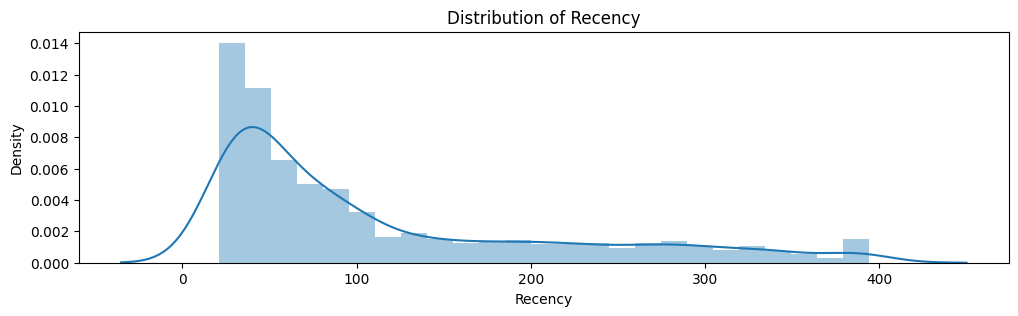

<ipython-input-34-7e58e4393c36>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_table[col])


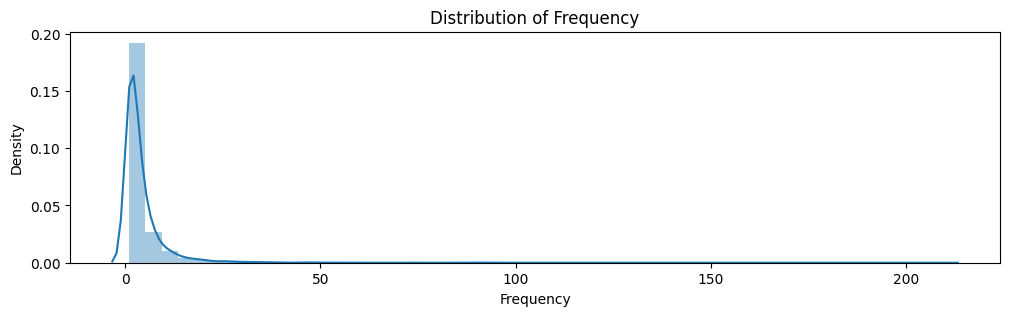

<ipython-input-34-7e58e4393c36>:5: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `histplot` (an axes-level function for histograms).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(rfm_table[col])


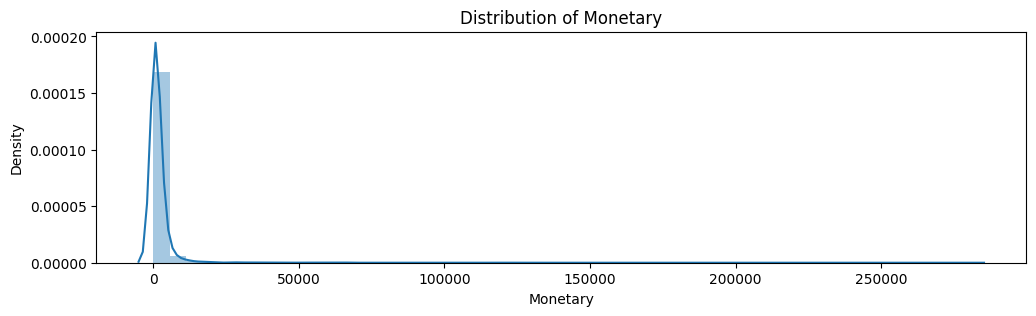

In [ ]:
colnames = ['Recency', 'Frequency', 'Monetary']

for col in colnames:
    fig, ax = plt.subplots(figsize=(12,3))
    sns.distplot(rfm_table[col])
    ax.set_title('Distribution of %s' % col)
    plt.show()

### Analyst of RFM Segments

Nhóm khách hàng Champion là nhóm có số lượng khách hàng nhiều nhất và cũng là nhóm khách hàng mang lại lợi nhuận cao nhất (với 19.25% trên tổng số khách hàng tạo ra 62.89% doanh thu) điều này cho thấy công ty đang có một lượng lớn khách hàng rất hài lòng và gắn bó với sản phẩm.

Nhóm Loyal và Potential Loyal chiếm khoảng 19,4% tổng số khách hàng và tạo ra khoảng 14% doanh số.

Đồng thời, điểm đáng lo ngại ở nhóm Hibernating  quá lớn, chiếm 16.04%. Điều này cho thấy một phần đáng kể khách hàng đã từng hoạt động nhưng giờ không còn nữa, cần tìm hiểu lý do không mua nữa của nhóm này (nguyên nhân do chất lượng sản phẩm, dịch vụ hay yếu tố nào khác), đưa ra các chiến lược để thu hút khách hàng trở lại.

Nhóm khách hàng Cannot lose them có quy mô nhỏ nhất, tuy nhiên nhóm này rất quan trọng vì họ có thể trở thành các nhóm Potential Loyal hoặc Loyal, rất cần thiết cho sự thành công của doanh nghiệp. Cần đặc biệt chú ý đến việc giữ chân và làm hài lòng nhóm khách hàng này.

Một lượng lớn các khách hàng ở nhóm At risk, Lost customers và Need to sleep đòi hỏi doanh nghiệp cần phải chú ý tìm hiểu lý do đằng sau hành vi của họ và thực hiện các biện pháp can thiệp để ngăn chặn tình trạng mất khách hàng.

<ipython-input-35-a185c9be0d11>:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Segment', data=rfm_table, palette=palette)
<ipython-input-35-a185c9be0d11>:4: UserWarning: The palette list has more values (13) than needed (11), which may not be intended.
  sns.countplot(x='Segment', data=rfm_table, palette=palette)


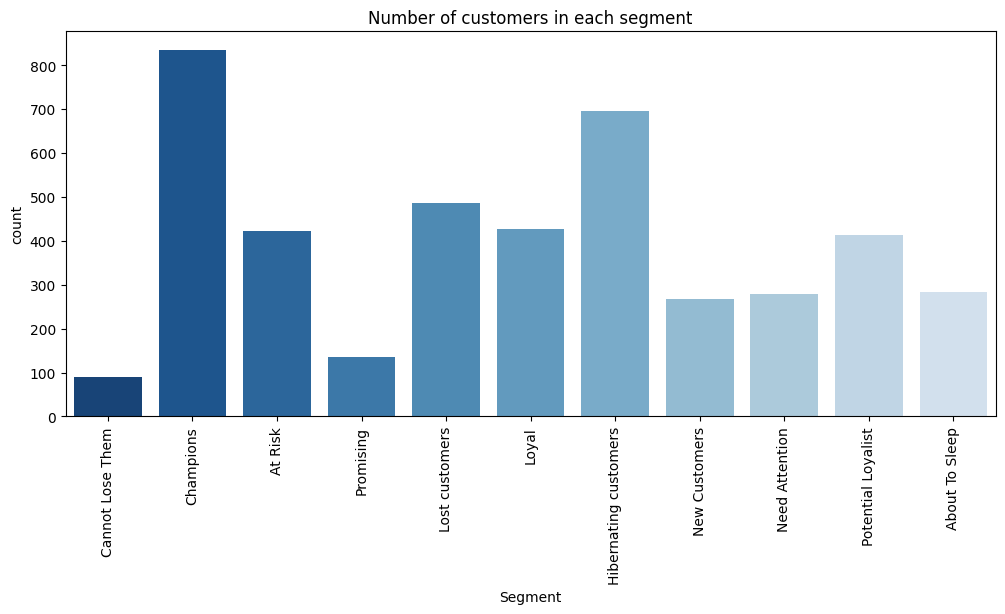

In [ ]:
palette = sns.color_palette("Blues_r", 13)

fig, ax = plt.subplots(figsize=(12,5))
sns.countplot(x='Segment', data=rfm_table, palette=palette)
ax.set_title('Number of customers in each segment')
plt.xticks(rotation=90)
plt.show()

In [ ]:
agg_dict2 = {
    'CustomerID': 'count',
    'Recency': 'mean',
    'Monetary': 'sum'
}

grp = rfm_table.groupby('Segment').agg(agg_dict2).sort_values(by='Recency').reset_index()
grp.rename({'CustomerID': 'Cust_count'}, axis=1, inplace=True)
grp['Cust_count_share'] = grp['Cust_count'] / grp['Cust_count'].sum()
grp['Monetary_share'] = grp['Monetary'] / grp['Monetary'].sum()
grp['Monetary'] = grp['Monetary'] / grp['Cust_count']

In [ ]:
!pip install squarify
import squarify

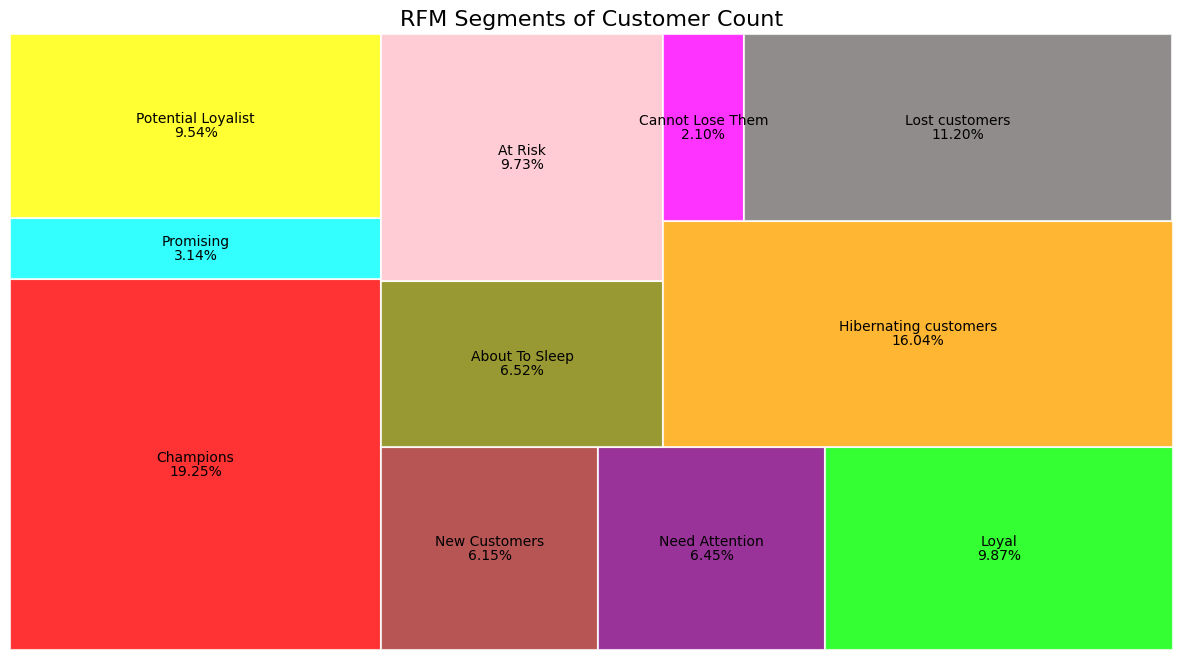

In [ ]:
colors = ['#FF0000', '#00FFFF', '#FFFF00', '#A52A2A', '#800080', '#00FF00', '#808000', '#FFC0CB', '#FFA500', '#FF00FF', '#736F6E']
fig, ax = plt.subplots(1, figsize = (15,8))

squarify.plot(sizes = grp['Cust_count'],
              label = grp['Segment'],
              value = [f'{x*100:.2f}%' for x in grp['Cust_count_share']],
              alpha = .8,
              color = colors,
              bar_kwargs = dict(linewidth=1.5, edgecolor='white')
              )
plt.title('RFM Segments of Customer Count', fontsize=16)
plt.axis('off')
plt.show()

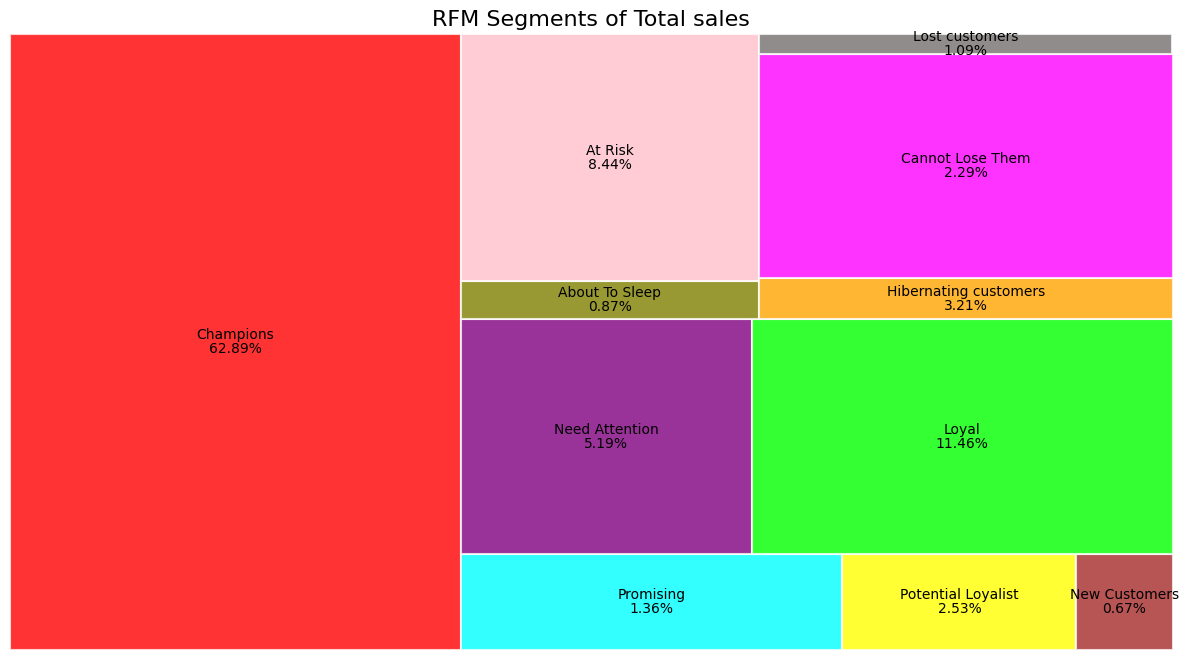

In [ ]:
fig, ax = plt.subplots(1, figsize = (15,8))

squarify.plot(sizes = grp['Monetary'],
              label = grp['Segment'],
              value = [f'{x*100:.2f}%' for x in grp['Monetary_share']],
              alpha = .8,
              color = colors,
              bar_kwargs = dict(linewidth=1.5, edgecolor='white')
              )
plt.title('RFM Segments of Total sales', fontsize=16)
plt.axis('off')
plt.show()

### Definition and recommended action for each customer segment:

| Segment | Characteristics | Recommendation |
| :-: | :-: | :-: |
| Champions | Bought recently, buy often and spend the most! | Reward them. Can be early adopters for new products. Will promote your brand. |
| Loyal | Spend good money with us often. Responsive to promotions. | Upsell higher value products. Ask for reviews. Engage them. |
| Potential Loyalist | Recent customers, but spent a good amount and bought more than once. | Offer membership / loyalty program, recommend other products. |
| New customers | Bought most recently, but not often. | Provide on-boarding support, give them early success, start building relationship. |
| Promising | Recent shoppers, but haven’t spent much. | Create brand awareness, offer free trials |
| Need attention | Above average recency, frequency and monetary values. May not have bought very recently though. | Make limited time offers, Recommend based on past purchases. Reactivate them. |
| About to sleep | Below average recency, frequency and monetary values. Will lose them if not reactivated. | Share valuable resources, recommend popular products / renewals at discount, reconnect with them. |
| At risk | Spent big money and purchased often. But long time ago. Need to bring them back! | Send personalized emails to reconnect, offer renewals, provide helpful resources. |
| Cannot lose them | Made biggest purchases, and often. But haven’t returned for a long time. | Win them back via renewals or newer products, don’t lose them to competition, talk to them. |
| Hibernating customers | Last purchase was long back, low spenders and low number of orders. | Offer other relevant products and special discounts. Recreate brand value. |
| Lost customers | Lowest recency, frequency and monetary scores. | Revive interest with reach out campaign, ignore otherwise. |